In [184]:
import pandas as pd
import numpy as np

from pandas_profiling import ProfileReport
import plotly.express as px
import re

from itertools import groupby
from datetime import datetime
import math

#import re
#from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer

#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize

import networkx as nx

from networkx.readwrite import json_graph

import seaborn as sns

import matplotlib.pyplot as plt

import zipfile

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.options.display.max_colwidth = 50

In [185]:
df = pd.read_excel("../data/external/Spec SKU Material and Labor_v2-2.xlsx", sheet_name='Spec Material DB 0.1',
                  header=0)

In [186]:
df.head(2)

,CC Code,Category,Sub-category,Item Type,LB/RFP Name,KitID,Specifications,Unnamed: 7,Unnamed: 8,Unnamed: 9,Grade,Unnamed: 11,Unnamed: 12,Dimensions,Unnamed: 14,Unnamed: 15,Color,Warranty,Image,Notes,Additional Tags,Unnamed: 21
0,NaN,NaN,NaN,NaN,NaN,NaN,tag1,tag2,tag3,tag4,Premium,Standard,Economy,X,Y,Z,NaN,NaN,NaN,NaN,atag1,atag2
1,3-05-5410,Kitchen,Cabinets,New Box Sets,New Box Sets - shaker - all wood - painted,NaN,shaker,all wood,painted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
df.columns

Index(['CC Code', 'Category', 'Sub-category', 'Item Type', 'LB/RFP Name  ',
       'KitID', 'Specifications', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Grade', 'Unnamed: 11', 'Unnamed: 12', 'Dimensions', 'Unnamed: 14',
       'Unnamed: 15', 'Color', 'Warranty', 'Image', 'Notes', 'Additional Tags',
       'Unnamed: 21'],
      dtype='object')

In [188]:
df.iloc[0,:].fillna("")

CC Code                    
Category                   
Sub-category               
Item Type                  
LB/RFP Name                
KitID                      
Specifications         tag1
Unnamed: 7             tag2
Unnamed: 8             tag3
Unnamed: 9             tag4
Grade               Premium
Unnamed: 11        Standard
Unnamed: 12         Economy
Dimensions                X
Unnamed: 14               Y
Unnamed: 15               Z
Color                      
Warranty                   
Image                      
Notes                      
Additional Tags       atag1
Unnamed: 21           atag2
Name: 0, dtype: object

In [189]:
new_cols = []

prev = df.columns[0]

for i, itm in enumerate(df.columns):
    if (itm != prev):
        if itm.startswith('Unnamed'):
            new_cols.append(prev)
        else:
            prev = itm
            new_cols.append(itm)
    else:
        new_cols.append(itm)
            
new_cols = [i.strip() + "_" + j.strip() for i,j in zip(new_cols, df.iloc[0,:].fillna(""))]
new_cols = [x.strip() for x in new_cols]
new_cols = [x.replace(" ", "_") for x in new_cols]
new_cols = [x.replace("-", "_") for x in new_cols]
new_cols

['CC_Code_',
 'Category_',
 'Sub_category_',
 'Item_Type_',
 'LB/RFP_Name_',
 'KitID_',
 'Specifications_tag1',
 'Specifications_tag2',
 'Specifications_tag3',
 'Specifications_tag4',
 'Grade_Premium',
 'Grade_Standard',
 'Grade_Economy',
 'Dimensions_X',
 'Dimensions_Y',
 'Dimensions_Z',
 'Color_',
 'Warranty_',
 'Image_',
 'Notes_',
 'Additional_Tags_atag1',
 'Additional_Tags_atag2']

In [190]:
df.columns = new_cols
df = df.iloc[1:,:]
df.head()

,CC_Code_,Category_,Sub_category_,Item_Type_,LB/RFP_Name_,KitID_,Specifications_tag1,Specifications_tag2,Specifications_tag3,Specifications_tag4,Grade_Premium,Grade_Standard,Grade_Economy,Dimensions_X,Dimensions_Y,Dimensions_Z,Color_,Warranty_,Image_,Notes_,Additional_Tags_atag1,Additional_Tags_atag2
1,3-05-5410,Kitchen,Cabinets,New Box Sets,New Box Sets - shaker - all wood - painted,NaN,shaker,all wood,painted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3-05-5410,Kitchen,Cabinets,New Box Sets,New Box Sets - shaker - all wood - thermofoil,NaN,flat,MDF,thermofoil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3-05-5410,Kitchen,Cabinets,New Box Sets,New Box Sets - shaker - all wood - melamine,NaN,NaN,NaN,melamine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3-05-5410,Kitchen,Cabinets,New Box Sets,New Box Sets - shaker - MDF - painted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3-05-5410,Kitchen,Cabinets,New Box Sets,New Box Sets - shaker - MDF - thermofoil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
df.drop(['CC_Code_', 'LB/RFP_Name_', 'KitID_'], axis=1, inplace=True)
df.drop_duplicates(inplace=True)
df.head(3)

,Category_,Sub_category_,Item_Type_,Specifications_tag1,Specifications_tag2,Specifications_tag3,Specifications_tag4,Grade_Premium,Grade_Standard,Grade_Economy,Dimensions_X,Dimensions_Y,Dimensions_Z,Color_,Warranty_,Image_,Notes_,Additional_Tags_atag1,Additional_Tags_atag2
1,Kitchen,Cabinets,New Box Sets,shaker,all wood,painted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kitchen,Cabinets,New Box Sets,flat,MDF,thermofoil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kitchen,Cabinets,New Box Sets,NaN,NaN,melamine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
df.shape

(63, 19)

In [193]:
ix = df.iloc[:,3:].isnull().apply(lambda x: np.sum(x) != len(x), axis=1)
df = df.loc[ix==True,:]
df.shape

(51, 19)

In [194]:
df.fillna("N/A", inplace=True)
df.loc[df.Item_Type_ == 'N/A', 'Item_Type_'] = df.loc[df.Item_Type_ == 'N/A', 'Sub_category_']
df.head()

,Category_,Sub_category_,Item_Type_,Specifications_tag1,Specifications_tag2,Specifications_tag3,Specifications_tag4,Grade_Premium,Grade_Standard,Grade_Economy,Dimensions_X,Dimensions_Y,Dimensions_Z,Color_,Warranty_,Image_,Notes_,Additional_Tags_atag1,Additional_Tags_atag2
1,Kitchen,Cabinets,New Box Sets,shaker,all wood,painted,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
2,Kitchen,Cabinets,New Box Sets,flat,MDF,thermofoil,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
3,Kitchen,Cabinets,New Box Sets,N/A,N/A,melamine,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
25,Kitchen,Cabinets,Paint,N/A,N/A,N/A,Boxes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
26,Kitchen,Cabinets,Paint,N/A,N/A,N/A,Doors & Boxes,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A


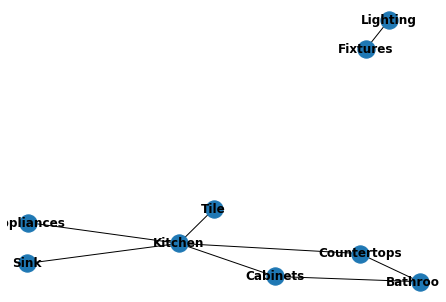

In [165]:
G = nx.Graph()

G.add_nodes_from(np.unique(df.Category_))

ix=1

d = df.iloc[:,ix-1:ix+1].drop_duplicates().dropna()

d_tuple = [(row[0], row[1]) for i, row in d.iterrows()]
G.add_edges_from(d_tuple)

d_tuple = {(row[0], row[1]):{'name': 'test'} for i, row in d.iterrows()}
nx.set_edge_attributes(G, d_tuple)

nx.draw(G, with_labels=True, font_weight='bold')      
##{(0, 1): {"attr1": 20, "attr2": "nothing"}, (1, 2): {"attr2": 3}}



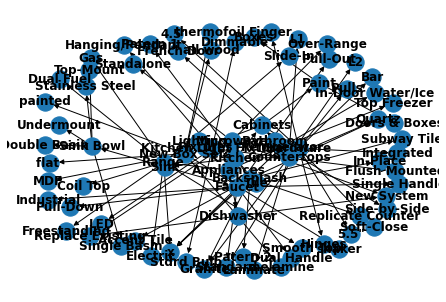

In [225]:
G = nx.DiGraph()

for ix, itm in enumerate(df.columns):
    if ix == 0:
        G.add_nodes_from(np.unique(df[itm]))
    elif ix <= 2:
        d = df.iloc[:,ix-1:ix+1].drop_duplicates().dropna()
        d_tuple = [(row[0], row[1]) for i, row in d.iterrows()]
        G.add_edges_from(d_tuple)
    else:
        d = df.iloc[:,[0,1,2,ix]].drop_duplicates().dropna()
        d = d[d[itm] != 'N/A']
        d = d.iloc[:,2:4]
        d_tuple = [(row[0], row[1]) for i, row in d.iterrows()]
        G.add_edges_from(d_tuple)
        
            
nx.draw(G, with_labels=True, font_weight='bold')       

In [220]:
[n for n,d in G.in_degree() if d==0] 

['Bathroom', 'Kitchen', 'Lighting']

In [208]:
G['Kitchen']

AtlasView({'Cabinets': {}, 'Countertops': {}, 'Sink': {}, 'Tile': {}, 'Appliances': {}})

In [214]:
G['Cabinets']

AtlasView({'New Box Sets': {}, 'Paint': {}, 'Hardware': {}})

In [215]:
G['New Box Sets']

AtlasView({'shaker': {}, 'flat ': {}, 'all wood': {}, 'MDF': {}, 'painted': {}, 'thermofoil': {}, 'melamine': {}})

In [213]:
G['Countertops']

AtlasView({'Countertops': {}, 'Granite': {}, 'Quartz': {}, 'Laminate': {}, 'L1': {}, 'L2': {}})

In [216]:
G['Sink']

AtlasView({'Sink Bowl': {}, 'Faucet': {}})

In [224]:
json_graph.tree_data(G,root=1)

TypeError: G is not a tree.

In [217]:
[item for item in nx.neighbors(G, 'Kitchen')]

['Cabinets', 'Countertops', 'Sink', 'Tile', 'Appliances']

In [218]:
[item for item in nx.neighbors(G, 'Cabinets')]

['New Box Sets', 'Paint', 'Hardware']